In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumer_key = 'a4lI3hGC6aArjwDP3uFxmkV7B'
consumer_secret = 'P82i45bd2toHPgutJ3YgBXTX0K3tjqT62oGds83MfUimC486LZ'
access_token = '1334417545483304960-jgLeBKg3atLpbky42gGRMhw12DedEd'
access_token_secret = 'IR0WCKwxEavZFUnxcvHVwEADInme6NvEAzktbNx2gqhrm'

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [4]:
posts = api.user_timeline(screen_name="@Ovo", count = 100,  lang="id", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:50]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) A testament to the power of design. (KH) https://t.co/5p8kQFjmk4

2) @LinkedInHelp What is your Ad Support chat hours. EVERYTIME we look it says "Unavailable".

3) Free Masks and Gloves for Oregon Businesses. Help us spread the word. https://t.co/wpdby5cRnm

4) @CinderDesignCo @tonalvideo Thank you!

5) We're excited to announce that the OVO-produced/directed film won "Best Director" (Ryan Durant), 2020 Oregon Documentary Film Festival, in addition to being nominated for "Best Northwest Documentary" &amp; "Best Oregon Director" + kudos to @tonalvideo, DP.  https://t.co/MxRa5WW915

6) @addictive_hero Chester, you're barking up the wrong tree.

7) Good on the MLB (KH) https://t.co/uuWk0xzwme

8) RT @ZapSurgical: Miss the ‘First in Man’ short film? After 7 surgeries, Bill Richardson was the first patient treated with ZAP-X. Bill's st…

9) We have been struck (yet again) by the swirling currents of brutality and humanity. Of a dying man crying out, “mama” whil

In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,A testament to the power of design. (KH) https...
1,@LinkedInHelp What is your Ad Support chat hou...
2,Free Masks and Gloves for Oregon Businesses. H...
3,@CinderDesignCo @tonalvideo Thank you!
4,We're excited to announce that the OVO-produce...


In [6]:

def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,A testament to the power of design. (KH)
1,What is your Ad Support chat hours. EVERYTIME...
2,Free Masks and Gloves for Oregon Businesses. H...
3,Thank you!
4,We're excited to announce that the OVO-produce...
...,...
95,Right? I get the limitation of the form facto...
96,"You say ""it's not a surcharge"" then link to ..."
97,Wrong OVO.
98,remember us? P.S. Did you know your name rhym...


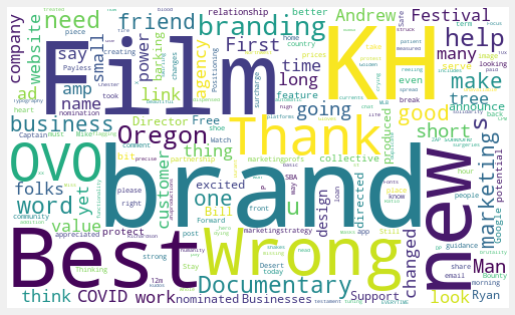

In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21,background_color = "white", max_font_size=110).generate(allWords)
plt.figure(figsize = (8, 8))


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

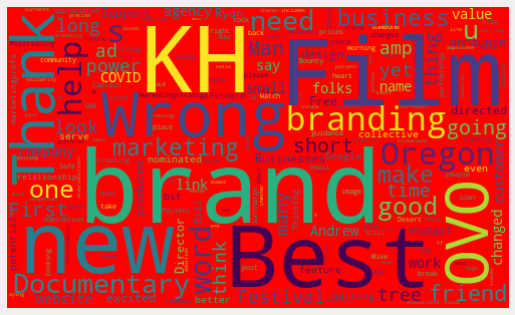

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21,background_color = "Red", max_font_size=100).generate(allWords)
plt.figure(figsize = (8, 8))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,A testament to the power of design. (KH),0.000000,0.000000,Neutral
1,What is your Ad Support chat hours. EVERYTIME...,0.000000,0.000000,Neutral
2,Free Masks and Gloves for Oregon Businesses. H...,0.800000,0.400000,Positive
3,Thank you!,0.000000,0.000000,Neutral
4,We're excited to announce that the OVO-produce...,0.275000,0.562500,Positive
...,...,...,...,...
95,Right? I get the limitation of the form facto...,0.517857,0.392857,Positive
96,"You say ""it's not a surcharge"" then link to ...",0.000000,0.000000,Neutral
97,Wrong OVO.,0.900000,-0.500000,Negative
98,remember us? P.S. Did you know your name rhym...,0.000000,0.000000,Neutral


In [10]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) _hero Chester, you're barking up the wrong tree.

2) We have been struck (yet again) by the swirling currents of brutality and humanity. Of a dying man crying out, “mama” while one paid to protect and serve him takes his life. Of the collective reeling, solidarity, and protest. Of blood and fire ...


3) "Destroying the ad-and-marketing budget is the worst thing a company could do to its brand during the pandemic"


4) 69 @88GLAMXO  40  Mike. I hate to break this to you, but: You're just not going to make the cut. Fee agent, or not, you've barked—rapped?!—up the wrong tree. Word.

5) _BPL    @10DowningStreet Andrew, Andrew, Andrew. The value offered, in relation to the cost of our services, is no doubt criminal. But I must inform you, we currently fall far short of the 1 billion you so adamantly declare—as much as I may wish that were not true. Alas, you keep doing you.

6) :  Mutiny on the Bounty was about the ruthless, unjust, tyrannical Captain Bligh of

In [11]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1) Free Masks and Gloves for Oregon Businesses. Help us spread the word. 

2) We're excited to announce that the OVO-produced/directed film won "Best Director" (Ryan Durant), 2020 Oregon Documentary Film Festival, in addition to being nominated for "Best Northwest Documentary" &amp; "Best Oregon Director" + kudos to , DP.  

3) Good on the MLB (KH) 

4) : Miss the ‘First in Man’ short film? After 7 surgeries, Bill Richardson was the first patient treated with ZAP-X. Bill's st…

5) We could all use a bit of good news. But beautiful news is even better. 

6)    How about a "duplicate ad" feature!? (shakes head). Even the most basic functionality of other platforms is missing—but the good news? You'll pay 5-10x the CPM. (KH)

7) I think it's high time we dispensed with the whole $xx.99 thing. The psychology of that has long worn off, it's cumbersome and it cheapens your brand.  (KH)

8) The hands-brain divide has limited the potential of many a company-agency re

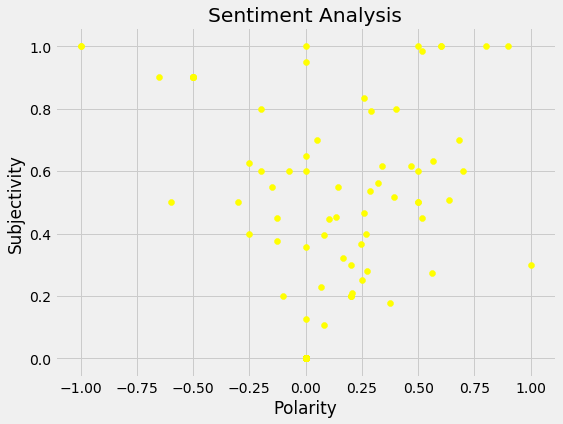

In [12]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Yellow') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [13]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

44.0

In [14]:

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

21.0

In [15]:
# Show the value counts
df['Analysis'].value_counts()

Positive    44
Neutral     35
Negative    21
Name: Analysis, dtype: int64

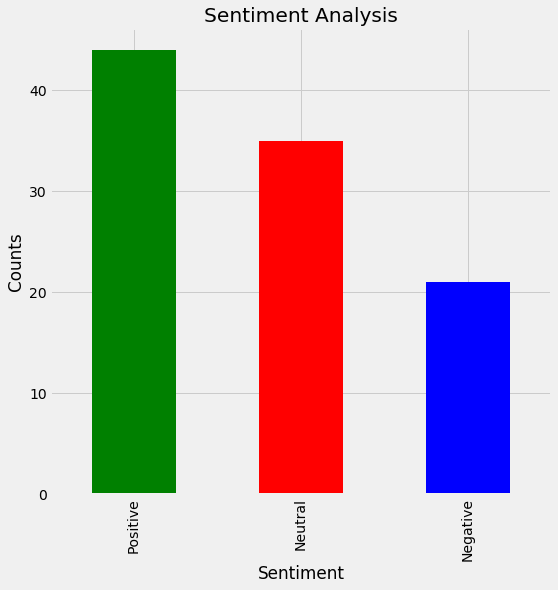

In [16]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar',figsize = (8, 8), color = ['g', 'r', 'b'],)
plt.show()

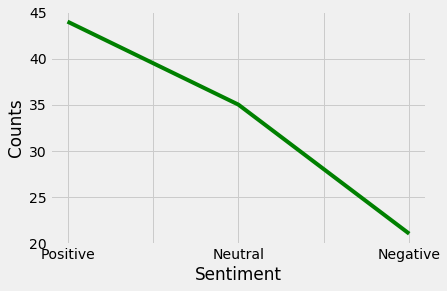

In [17]:
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line',color = ['g'])
plt.show()